In [2]:
import keras as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [3]:
train_datagen = K.preprocessing.image.ImageDataGenerator()

validation_datagen = K.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(50, 50),
        batch_size=1,
        color_mode='grayscale',
        class_mode='categorical',
        )

validation_generator = validation_datagen.flow_from_directory(
        'dataset/validation',
        target_size=(50, 50),
        batch_size=1,
        color_mode='grayscale',
        class_mode="categorical",
        )

Found 15512 images belonging to 28 classes.
Found 2269 images belonging to 28 classes.


In [8]:
sq = K.models.Sequential()


In [4]:
early_stop = K.callbacks.EarlyStopping(monitor='val_acc',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='max')

In [13]:
class F1_Score_Callback(K.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        print ("teste1")
    
    def on_epoch_end(self, epoch, logs={}):
#         val_predict = (np.asarray(self.model.predict(self.model.validation_data[0]))).round()
#         val_targ = self.model.validation_data[1]
#         _val_f1 = f1_score(val_targ, val_predict)
#         self.val_f1s.append(_val_f1)
        print(self.model)
        
f1_score_callback = F1_Score_Callback()

In [6]:
INPUT_SHAPE = (50, 50, 1)
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
CLASSES = 28
STEPS = (int)(train_generator.n/BATCH_SIZE)

model = Sequential()
        
model.add(Conv2D(20, kernel_size=3, padding="same", input_shape=INPUT_SHAPE))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(50, kernel_size=3, border_mode="same"))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(700))
model.add(Activation("relu"))

model.add(Dense(CLASSES))

model.summary()

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 20)        200       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 700)               8750700   
_________________________________________________________________
activation_2 (Activation)    (None, 700)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 28)                19628     
Total para

In [14]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS,
        epochs=NB_EPOCH,
        verbose=VERBOSE,
        validation_data=validation_generator,
        validation_steps=STEPS,
        callbacks = [early_stop, f1_score_callback]
)

teste1
Epoch 1/10
121/121 [==============================] - 3s 21ms/step - loss: 14.4070 - acc: 0.3884 - val_loss: 11.4726 - val_acc: 0.3802
Epoch 2/10
121/121 [==============================] - 2s 20ms/step - loss: 13.9920 - acc: 0.3058 - val_loss: 15.2054 - val_acc: 0.3802
Epoch 3/10
121/121 [==============================] - 2s 20ms/step - loss: 15.3189 - acc: 0.3884 - val_loss: 15.2058 - val_acc: 0.3802
Epoch 4/10
121/121 [==============================] - 2s 20ms/step - loss: 15.0524 - acc: 0.3306 - val_loss: 15.2058 - val_acc: 0.3802


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


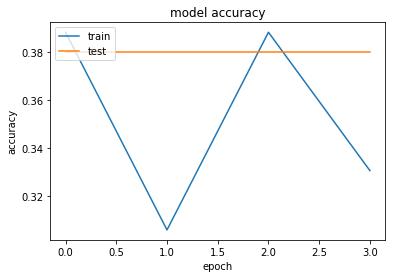

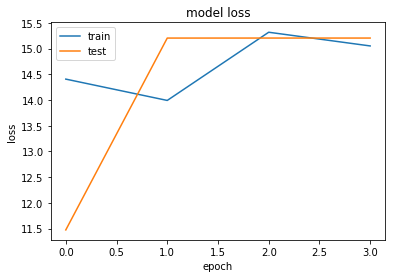

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()